# Dataset downloaded.

# Image Augmentation.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from keras.layers import Convolution2D
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import MaxPooling2D
from keras.layers import Flatten


from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2

In [7]:
from google.colab import drive
drive.mount('/content/drive/')
path = '/content/drive/MyDrive/flowers/'
batch_size = 32
target_size = (64, 64)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [8]:
train_datagenertion = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip=True,
                                   validation_split=0.2)

test_datageneration = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)

In [9]:
X_train = train_datagenertion.flow_from_directory(path,target_size=target_size,batch_size=batch_size,subset="training",class_mode='categorical')
X_test = test_datageneration.flow_from_directory(path,target_size=target_size,batch_size=batch_size,
                                          subset="validation",
                                          class_mode='categorical')

Found 3518 images belonging to 5 classes.
Found 877 images belonging to 5 classes.


# Create Model

In [10]:
Model = Sequential()

# Add Layers (Convolution,MaxPooling,Flatten,Dense-(HiddenLayers),Output)

In [11]:
Model.add(Convolution2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
Model.add(MaxPooling2D(pool_size=(2, 2)))

Model.add(Convolution2D(32, (3, 3), activation='relu'))
Model.add(MaxPooling2D(pool_size=(2, 2)))

Model.add(Convolution2D(64, (3, 3), activation='relu'))
Model.add(MaxPooling2D(pool_size=(2, 2)))

Model.add(Flatten())

Model.add(Dense(units=64, activation='relu'))
Model.add(Dense(units=5, activation='softmax'))
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

# Compile the model

In [12]:
Model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the Model

In [13]:
Model.fit(X_train, steps_per_epoch=100, epochs=15)

Epoch 1/15
100/100 [==============================] - 917s 9s/step - loss: 1.3227 - accuracy: 0.4149
Epoch 2/15
100/100 [==============================] - 101s 1s/step - loss: 1.1272 - accuracy: 0.5297
Epoch 3/15
100/100 [==============================] - 34s 342ms/step - loss: 1.0195 - accuracy: 0.5932
Epoch 4/15
100/100 [==============================] - 33s 325ms/step - loss: 0.9807 - accuracy: 0.6101
Epoch 5/15
100/100 [==============================] - 33s 324ms/step - loss: 0.9344 - accuracy: 0.6382
Epoch 6/15
100/100 [==============================] - 31s 313ms/step - loss: 0.8669 - accuracy: 0.6697
Epoch 7/15
100/100 [==============================] - 32s 323ms/step - loss: 0.8466 - accuracy: 0.6754
Epoch 8/15
100/100 [==============================] - 31s 312ms/step - loss: 0.8422 - accuracy: 0.6729
Epoch 9/15
100/100 [==============================] - 32s 315ms/step - loss: 0.8079 - accuracy: 0.6825
Epoch 10/15
100/100 [==============================] - 31s 311ms/step - loss:

# Save the Model

In [14]:
Model.save("Model.h5")

# Test the Model

1/1 [==============================] - 0s 432ms/step
The image is sunflower


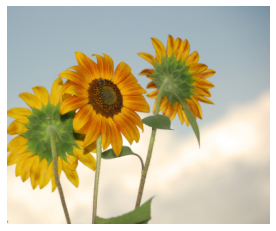

In [17]:
def test():
    img = image.load_img("/content/drive/MyDrive/flowers/sunflower/2442985637_8748180f69.jpg", target_size=target_size)
    i = image.img_to_array(img)
    i = tf.expand_dims(i,0)

    labels = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
    
    prd = Model.predict(i)
    Prediction = labels[np.argmax(prd[0])]
    
    print(f'The image is {Prediction}')
    plt.imshow(plt.imread("/content/drive/MyDrive/flowers/sunflower/2442985637_8748180f69.jpg"))
    plt.axis('off')
    plt.show()

test()